 ![alt text](https://i.imgur.com/1WaY7aA.png)

---



---



# Lab 2.2.3 
# *Mining Social Media on Reddit*

## The Reddit API and the PRAW Package

The Reddit API is rich and complex, with many endpoints (https://www.reddit.com/dev/api/). It includes methods for navigating its collections, which include various kinds of media as well as comments. Fortunately, the Python library PRAW reduces much of this complexity.

Reddit requires developers to create and authenticate an app before they can use the API, but the process is much less onerus than some, and does not have waiting period for approval of new developers (as of 18 August 2018).

### 1. Create a Reddit App

Go to https://www.reddit.com/prefs/apps and click "create an app".

Enter the following in the form:

- a name for your app
- select "script" radio button
- a description
- a redirect URI

(Nb. For pulling data into a data science experiment, a local port can be used for the Redirect URI; try http://127.0.0.1:1410)

![image.png](attachment:image.png)

- click "create app"
- from the form that displays, copy the following to a local text file (or to this notebook):

  - name (the name you gave to your app)
  - redirect URI
  - personal use script (this is your OAuth 2 Client ID)
  - secret (this is your OAuth 2 Secret)

### 2. Register for API Access

- follow the link at https://www.reddit.com/wiki/api and read the terms of use for Reddit API access 
- fill in the form fields at the bottom 
  - make sure to enter your new OAuth Client ID where indicated
  - your use case could be something like "Training in API usage for data science projects"
  - your platform could be something like "Jupyter Notebooks / Python"
  
- click "SUBMIT"
 
- when asked for User-Agent, enter something that fits this pattern:
  `your_os-python:your_reddit_appname:v1.0 (by /u/your_reddit_username)`

### 3. Load Python Libraries

In [1]:
import praw
import requests
import json
import pprint
from datetime import datetime, date, time

### 4. Authenticate from your Python script

You could assign your authentication details explicitly, as follows:
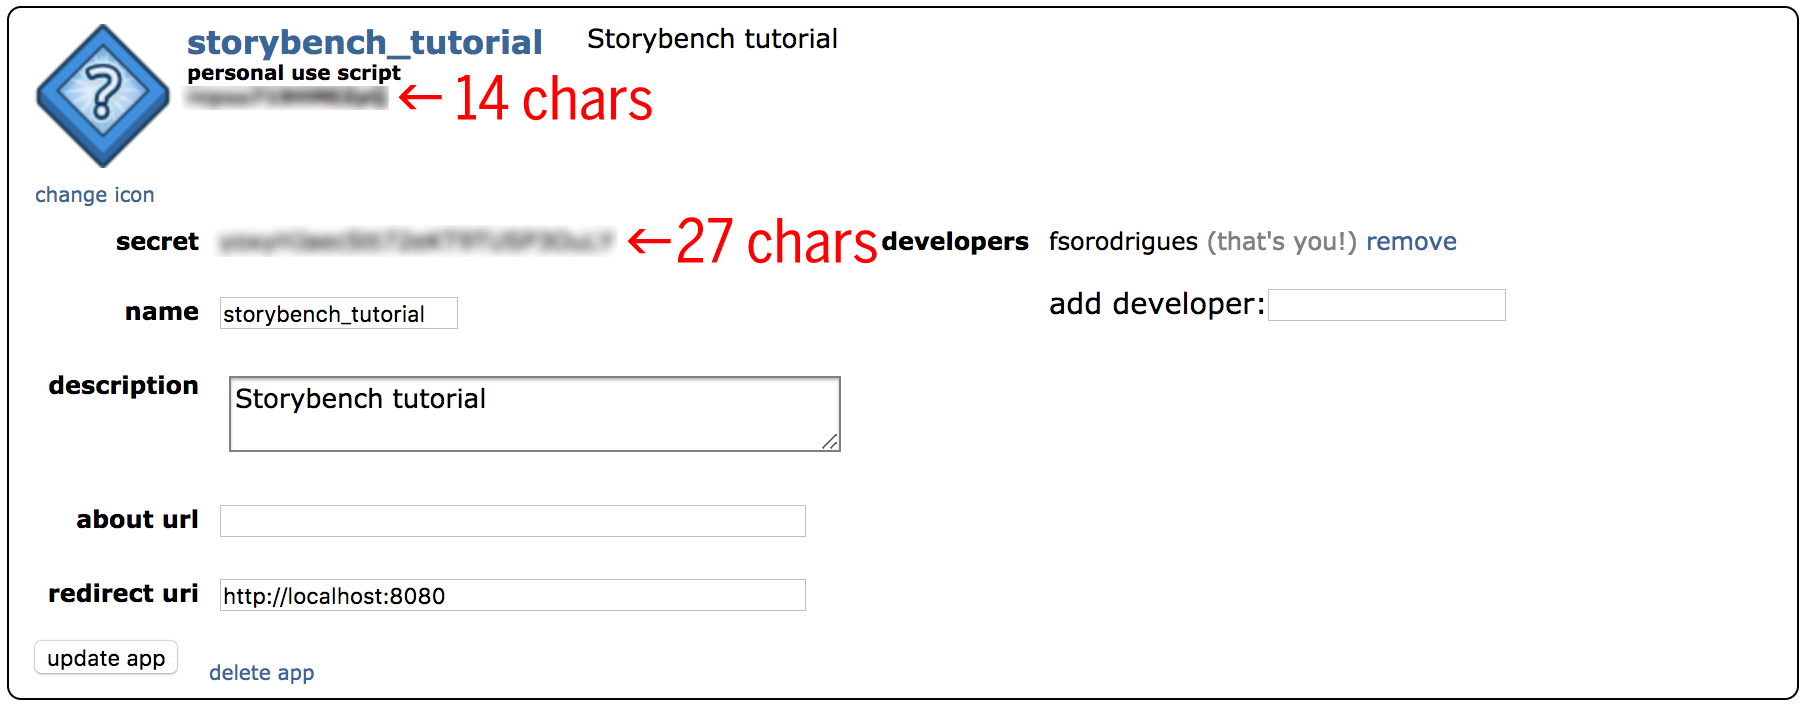

In [8]:
# reddit = praw.Reddit(client_id='PERSONAL_USE_SCRIPT_14_CHARS', \
#                      client_secret='SECRET_KEY_27_CHARS ', \
#                      user_agent='YOUR_APP_NAME', \
#                      username='YOUR_REDDIT_USER_NAME', \
#                      password='YOUR_REDDIT_LOGIN_PASSWORD')

auth_reddit_json = {
    my_user_agent:'Hill Tran',
    my_client_id:'zmY7rozqnYLSjw',
    my_client_secret:'JJRmZjzRcd4qPKk7S7GhNayMg2g'
    }

A better way would be to store these details externally, so they are not displayed in the notebook:

- create a file called "auth_reddit.json" in your "notebooks" directory, and save your credentials there in JSON format:

`{   "my_client_id": "your Client ID string goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;` "my_client_secret": "your Secret string goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"my_user_agent": "your user Agent string goes in here"` <br>
`}`

Use the following code to load the credentials:  

In [9]:
pwd()  # make sure your working directory is where the file is

'/Users/hieu/Desktop/hill_DS/DSIA-SYD-FT-Projects-201907/hieu/Lab2_Hieu'

In [11]:
path_auth = auth_reddit_json
auth = json.loads(open(path_auth).read())
pp = pprint.PrettyPrinter(indent=4)
# For debugging only:
#pp.pprint(auth)

# my_user_agent = auth['Hill Tran']
# my_client_id = auth['zmY7rozqnYLSjw']
# my_client_secret = auth['JJRmZjzRcd4qPKk7S7GhNayMg2g']

TypeError: expected str, bytes or os.PathLike object, not dict

Security considerations: 
- this method only keeps your credentials invisible as long as nobody else gets access to this notebook file 
- if you wanted another user to have access to the executable notebook without divulging your credentials you should set up an OAuth 2.0 workflow to let them obtain and apply their own API tokens when using your app
- if you just want to share your analyses, you could use a separate script (which you don't share) to fetch the data and save it locally, then use a second notebook (with no API access) to load and analyse the locally stored data

### 5. Exploring the API

Here is how to connect to Reddit with read-only access:

In [12]:
reddit = praw.Reddit(client_id = my_client_id, 
                     client_secret = my_client_secret, 
                     user_agent = my_user_agent)

print('Read-only = ' + str(reddit.read_only))  # Output: True

Read-only = True


In the next cell, put the cursor after the '.' and hit the [tab] key to see the available members and methods in the response object:

In [14]:
reddit.inbox

Consult the PRAW and Reddit API documentation. Print a few of the response members below:

In [ ]:
start here

Content in Reddit is grouped by topics called "subreddits". Content, called "submissions", is fetched by calling the `subreddit` method of the connection object (which is our `reddit` variable) with an argument that matches an actual topic. 

We also need to append a further method call to a "subinstance", such as one of the following:

- controversial
- gilded
- hot
- new
- rising
- top

One of the submission objects members is `title`. Fetch and print 10 submission titles from the 'learnpython' subreddit using one of the subinstances above:

In [15]:
for submission in reddit.subreddit('learnpython').hot(limit=10):
    print(submission.title)

Ask Anything Monday - Weekly Thread
Learning Programming with Python !
How to accept two or more inputs and output the same result?
Installing PyQt4 in conda.
Communicating with a spawned thread
I made a script to organise your downloads folder.
Confusion about running python docker scheduler.
Help with function to find a 'path' through multiple lists
python tutor dallas
Sharing a Project I made for my company


Now retrieve 10 authors:

In [16]:
for submission in reddit.subreddit('learnpython').hot(limit=10):
    print(submission.author)

AutoModerator
YeastBeast33
S-S-R
H-animal-K
Sloppyjoeman
zippyzapdap
colafroth
donthaveauseryet
dyaters68
shitbeer


Note that we obtained the titles and authors from separate API calls. Can we expect these to correspond to the same submissions? If not, how could we gurantee that they do?

Why doesn't the next cell produce output?

In [ ]:
for submission in submissions:
    print(submission.comments)

Print two comments associated with each of these submissions:

In [ ]:
submissions = reddit.subreddit('learnpython').hot(limit=10)
for submission in submissions:
    top_level_comments = list(submission.comments)
    all_comments = submission.comments.list()[:2]
    for comment in all_comments:
        print(comment.body)

Referring to the API documentation, explore the submissions object and print some interesting data:

#### Posting to Reddit

To be able to post to your Reddit account (i.e. contribute submissions), you need to connect to the API with read/write privilege. This requires an *authorised instance*, which is obtained by including your Reddit user name and password in the connection request: 

In [ ]:
reddit = praw.Reddit(client_id='my client id',
                     client_secret='my client secret',
                     user_agent='my user agent',
                     username='my username',
                     password='my password')
print(reddit.read_only)  # Output: False

You could hide these last two credentials by adding them to your JSON file and then reading all five values at once.

>
>


>
>




---



---

> > > > > > > > > © 2019 Data Science Institute of Australia


---



---

